# Drought Analysis of Individual Wells

This code was created to calculate slopes and perform our drought analysis on each individual wells used in this study.

To run this code, you need to follow all of the DataPreprocessing instructions.

Total time to run on my machine: 5 seconds or less

In [26]:
# Packages and paths

import os
import numpy as np
import pandas as pd
#import earthpy as et
import scipy.stats as sp

# Local paths
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'

# Function to calculate slope using linear regression
def calculate_slope(y):
    x = np.arange(len(y))
    slope, _ = np.polyfit(x, y, 1)
    return slope

In [27]:
# ==== Reading in the data ====
# Read in the annual time series database
filename_ts = 'Wells55_GWSI_WLTS_DB_annual_updated.csv'
filepath = os.path.join(outputpath, filename_ts)
annual_db = pd.read_csv(filepath, header=1, index_col=0)
print("Well data loaded.")

annual_db = annual_db[1:168102]
annual_db.index.astype('int64')
annual_db2 = annual_db.reset_index(inplace=True)
annual_db2 = annual_db.rename(columns = {'year':'Combo_ID'})
annual_db2 = annual_db2.set_index('Combo_ID')
annual_db2.head()
print("Well data formatted.")

# Read in the drought indices

#  Input the date you downloaded the drought files
# date_downloaded = "06102024"

# drought_indices = pd.read_csv(f'{inputpath}/Yearly_DroughtIndices_updated{date_downloaded}.csv') #this version doesn't have PHDI so adjust accordingly
# drought_indices = drought_indices.set_index('In_year')
# print("Drought data loaded and formatted.")

Well data loaded.
Well data formatted.


Setting up the analysis period

In [28]:
# Enter min year and max year of timeframe
minyear = 2000
maxyear = 2024

# %% Figure out which water level database you want
cat_wl2 = annual_db2.copy()
cat_wl2 = cat_wl2.transpose()
cat_wl2 = cat_wl2.reset_index()
cat_wl2['index'] = pd.to_numeric(cat_wl2['index'], errors='coerce')
cat_wl2.index = cat_wl2.index.astype('int64')
cat_wl2 = cat_wl2.set_index('index')

cat_wl2
# Water Analysis period
wlanalysis_period_AZwells = cat_wl2[(cat_wl2.index>=minyear)&(cat_wl2.index<=maxyear)]
wlanalysis_period_AZwells

Combo_ID,60001,82721,83226,83578,83716,84067,84442,84455,84460,84580,...,627552,627553,627554,627555,627556,627557,627558,627559,627560,627561
index,,,,,,,,,,,,,,,,,,,,,
2000.0,523.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2
2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003.0,524.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004.0,524.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7
2006.0,523.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008.0,521.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Water Analysis period for the first 10 years
wlanalysis_period_AZwells_0010 = cat_wl2[(cat_wl2.index>=minyear)&(cat_wl2.index<=2010)]
wlanalysis_period_AZwells_0010

# Water Analysis period next 10
wlanalysis_period_AZwells_1020 = cat_wl2[(cat_wl2.index>=2010)&(cat_wl2.index<=2020)]
wlanalysis_period_AZwells_1020

# Water Analysis period
wlanalysis_period_AZwells_2024 = cat_wl2[(cat_wl2.index>=2020)&(cat_wl2.index<=2024)]
wlanalysis_period_AZwells_2024

Combo_ID,60001,82721,83226,83578,83716,84067,84442,84455,84460,84580,...,627552,627553,627554,627555,627556,627557,627558,627559,627560,627561
index,,,,,,,,,,,,,,,,,,,,,
2020.0,487.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3
2021.0,485.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022.0,483.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023.0,483.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(wlanalysis_period_AZwells_2024.transpose())

index     2020.0  2021.0  2022.0  2023.0  2024.0
Combo_ID                                        
60001     487.85   485.1   483.5   483.9     NaN
82721        NaN     NaN     NaN     NaN     NaN
83226        NaN     NaN     NaN     NaN     NaN
83578        NaN     NaN     NaN     NaN     NaN
83716        NaN     NaN     NaN     NaN     NaN
...          ...     ...     ...     ...     ...
627557       NaN     NaN     NaN     NaN     NaN
627558       NaN     NaN     NaN     NaN     NaN
627559       NaN     NaN     NaN     NaN     NaN
627560       NaN     NaN     NaN     NaN     NaN
627561     33.30     NaN     NaN     NaN     NaN

[168101 rows x 5 columns]


In [31]:
wlanalysis_period_AZwells_0010_mean = wlanalysis_period_AZwells_0010.mean()
wlanalysis_period_AZwells_1020_mean = wlanalysis_period_AZwells_1020.mean()
wlanalysis_period_AZwells_2024_mean = wlanalysis_period_AZwells_2024.mean()
wlanalysis_period_AZwells_2024_mean

Combo_ID
60001     485.0875
82721          NaN
83226          NaN
83578          NaN
83716          NaN
            ...   
627557         NaN
627558         NaN
627559         NaN
627560         NaN
627561     33.3000
Length: 168101, dtype: float64

In [32]:
wlanalysis_period_AZwells_0010_mean

Combo_ID
60001     520.914286
82721            NaN
83226            NaN
83578            NaN
83716            NaN
             ...    
627557           NaN
627558           NaN
627559           NaN
627560           NaN
627561     10.450000
Length: 168101, dtype: float64

In [11]:
# Export CSV for plotting
wlanalysis_period_AZwells_0010_mean.to_csv(outputpath+'/MeanWL_20002010.csv')
wlanalysis_period_AZwells_1020_mean.to_csv(outputpath+'/MeanWL_20102020.csv')
wlanalysis_period_AZwells_2024_mean.to_csv(outputpath+'/MeanWL_20202024.csv')

This is to try and flag wells that used to be shallow and are now no longer shallow

In [33]:
wl_difference = wlanalysis_period_AZwells_0010_mean - wlanalysis_period_AZwells_2024_mean
wl_difference

Combo_ID
60001     35.826786
82721           NaN
83226           NaN
83578           NaN
83716           NaN
            ...    
627557          NaN
627558          NaN
627559          NaN
627560          NaN
627561   -22.850000
Length: 168101, dtype: float64

In [34]:
# Create a new DataFrame with the differences
wells_diff = pd.DataFrame({
    'Difference': wl_difference
})

# Define a function to label the changes
def label_change(diff):
    if pd.isna(diff):  # If NaN, keep it as NaN
        return np.nan
    elif diff > 0:
        return "Gaining Water"
    elif diff < 0:
        return "Losing Water"
    else:
        return "No Change"

# Apply the function to the Difference column
wells_diff['Change'] = wells_diff['Difference'].apply(label_change)

print(wells_diff)


          Difference         Change
Combo_ID                           
60001      35.826786  Gaining Water
82721            NaN            NaN
83226            NaN            NaN
83578            NaN            NaN
83716            NaN            NaN
...              ...            ...
627557           NaN            NaN
627558           NaN            NaN
627559           NaN            NaN
627560           NaN            NaN
627561    -22.850000   Losing Water

[168101 rows x 2 columns]


In [21]:
wells_diff.to_csv(outputpath+'/WLDifference.csv')

More specifically, marking wells that were less than 5m before 2010 but now are greater than 10m

In [35]:
df = wlanalysis_period_AZwells.copy()

df.index


Float64Index([2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
              2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0,
              2024.0],
             dtype='float64', name='index')

In [36]:
# Step 1: Identify wells < 5m prior to 2010
pre_2010 = df[df.index < 2010]
wells_pre_2010 = (pre_2010.iloc[:, 1:] <= 5).any(axis=0)  # Check each well column

# Step 2: Identify wells > 10m post-2010
post_2010 = df[df.index >= 2010]
wells_post_2010 = (post_2010.iloc[:, 1:] >= 5).any(axis=0)  # Check each well column

# Step 3: Combine the conditions
flagged_wells = wells_pre_2010 & wells_post_2010
flagged_wells
# Step 4: Create a new column in the original DataFrame to indicate flagged wells
flagged_wells_df = pd.DataFrame({'index': flagged_wells.index, 'Flagged': flagged_wells.values})
flagged_wells_df

# Add the flagged wells as a new column in the original DataFrame
# Note - this didn't work
# df['Flagged'] = df.columns.isin(flagged_wells[flagged_wells].index).astype(bool)

,index,Flagged
0,82721,False
1,83226,False
2,83578,False
3,83716,False
4,84067,False
...,...,...
168095,627557,False
168096,627558,False
168097,627559,False
168098,627560,False


In [37]:
flagged_wells_df['Flagged'].unique()

array([False,  True])

In [38]:
flagged_wells_df.to_csv(outputpath+'/LostShallowGroundwater_5m.csv')

In [13]:
# From Chatgpt
# Calculate the mean water levels for each well in each time period
mean_2000_2010 = wlanalysis_period_AZwells_0010.mean()
mean_2020_2024 = wlanalysis_period_AZwells_2024.mean()

# Combine the data into a single DataFrame for easier analysis
wells_combined = pd.DataFrame({
    'mean_2000_2010': mean_2000_2010,
    'mean_2020_2024': mean_2020_2024
})

# Set your thresholds
threshold_low = 0  # Example: threshold for "shallow"
threshold_high = 20  # Example: threshold for "deep"

# Flag wells that transitioned from below `threshold_low` to above `threshold_high`
wells_combined['flag_transition'] = (
    (wells_combined['mean_2000_2010'] < threshold_low) &
    (wells_combined['mean_2020_2024'] > threshold_high)
)

# Filter flagged wells if you want a separate DataFrame
flagged_wells = wells_combined[wells_combined['flag_transition']]

print(flagged_wells)


          mean_2000_2010  mean_2020_2024  flag_transition
Combo_ID                                                 
503653             8.615           36.50             True
595245             0.000           77.29             True
598101             0.000           77.70             True
614816             7.100           86.60             True
617664             0.000           68.00             True


In [14]:
flagged_wells

,mean_2000_2010,mean_2020_2024,flag_transition
Combo_ID,,,
503653,8.615,36.50,True
595245,0.000,77.29,True
598101,0.000,77.70,True
614816,7.100,86.60,True
617664,0.000,68.00,True


Take care of NaN values by interpolating and backfilling

In [16]:
# Calculate the difference between the two periods
wells_combined['difference'] = wells_combined['mean_2020_2024'] - wells_combined['mean_2000_2010']

# Define a threshold for significant changes (e.g., greater than +5 or less than -5)
threshold_positive = 5  # Example: Significant increase in water level
threshold_negative = -5  # Example: Significant decrease in water level

# Flag wells based on the difference
wells_combined['flag_significant_change'] = (
    (wells_combined['difference'] > threshold_positive) |  # Significant rise
    (wells_combined['difference'] < threshold_negative)    # Significant drop
)

# Filter flagged wells if needed
flagged_wells_difference = wells_combined[wells_combined['flag_significant_change']]

print(flagged_wells_difference)


          mean_2000_2010  mean_2020_2024  flag_transition  difference  \
Combo_ID                                                                
60001         520.914286        485.0875            False  -35.826786   
85337         521.600000        529.9000            False    8.300000   
85460         529.100000        543.2000            False   14.100000   
85622         307.550000        316.0000            False    8.450000   
85863          89.752561        119.8900            False   30.137439   
...                  ...             ...              ...         ...   
627209        603.175000        610.3000            False    7.125000   
627220        827.992857        842.1750            False   14.182143   
627354        182.400000         77.8000            False -104.600000   
627522         39.700000         34.0000            False   -5.700000   
627561         10.450000         33.3000            False   22.850000   

          flag_significant_change  
Combo_ID      

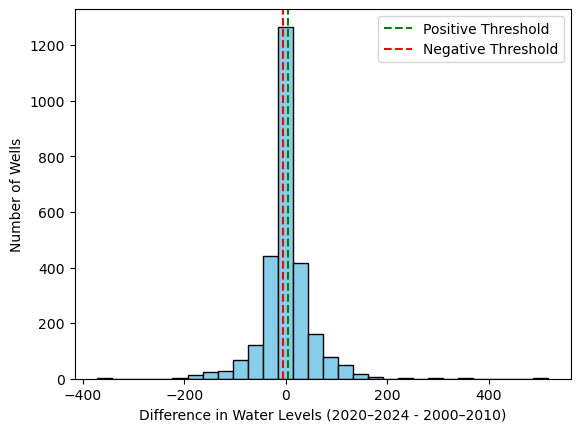

In [17]:
import matplotlib.pyplot as plt

# Histogram of differences
plt.hist(wells_combined['difference'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold_positive, color='green', linestyle='dashed', label='Positive Threshold')
plt.axvline(threshold_negative, color='red', linestyle='dashed', label='Negative Threshold')
plt.xlabel('Difference in Water Levels (2020–2024 - 2000–2010)')
plt.ylabel('Number of Wells')
plt.legend()
plt.show()


In [52]:
df_interpolated = wlanalysis_period_AZwells.interpolate(method='linear', axis=0)
df_interpolated = df_interpolated.bfill()
df_interpolated

Combo_ID,60001,85358,85761,85799,85863,85970,86280,86642,87174,87570,...,809568,809570,809687,809833,809942,810276,810297,905200,905773,908192
index,,,,,,,,,,,,,,,,,,,,,
2000.0,523.900000,275.8000,41.60,61.8500,80.800000,133.10,36.20,211.800,236.900000,423.200000,...,130.70,34.200,641.50,435.000000,121.500,38.846000,49.600000,80.000,143.860000,322.300000
2001.0,524.166667,275.8000,42.20,61.4000,81.246667,133.10,36.20,211.775,243.500000,423.516667,...,130.30,34.600,640.95,435.000000,120.550,38.548000,47.900000,80.000,143.860000,322.300000
2002.0,524.433333,277.4000,42.20,61.3125,84.725000,133.10,36.20,211.750,241.700000,423.833333,...,130.60,35.700,640.40,435.000000,119.600,35.380000,49.090000,80.000,143.860000,322.300000
2003.0,524.700000,278.5000,42.85,61.2250,84.684000,132.90,37.90,215.250,240.683333,424.150000,...,130.90,32.100,640.80,435.000000,116.610,39.394000,49.400000,80.000,143.860000,322.300000
2004.0,524.800000,280.1000,46.00,61.4000,87.340000,138.25,37.00,223.000,239.666667,424.800000,...,131.40,29.000,640.50,434.783333,115.000,40.600000,49.400000,80.000,143.860000,322.300000
2005.0,524.300000,279.4000,42.60,61.7000,87.770000,143.60,35.40,226.600,238.650000,425.450000,...,131.50,22.800,640.20,434.566667,117.800,40.840000,50.300000,80.000,143.860000,321.200000
2006.0,523.800000,279.2000,43.00,59.9000,89.442500,141.30,37.70,226.200,236.750000,426.100000,...,131.15,27.000,641.80,434.350000,117.400,39.522500,50.600000,80.000,143.860000,320.100000
2007.0,522.450000,279.3500,43.70,60.3000,95.720000,132.80,36.90,228.600,235.275000,426.300000,...,130.80,28.900,640.90,434.700000,118.400,38.220000,50.900000,80.825,143.860000,319.000000
2008.0,521.100000,277.3800,42.30,60.5000,96.310000,133.50,36.10,234.000,233.800000,426.500000,...,131.00,27.025,640.35,434.150000,119.400,37.006667,52.066667,81.650,154.272000,320.383333


Calculate Anomalies based on the trend (slope)

In [53]:
# Anomaly's
ds = df_interpolated.copy()
columns = ds.columns
column_list = ds.columns.tolist()
trend_df = df_interpolated.copy()
dtw_anomalys_allwells = pd.DataFrame()
for i in column_list:
        # Subtracting against the slope
        df = ds[i]
        y=np.array(df.values, dtype=float)
        x = np.array(pd.to_datetime(df).index.values, dtype=float)
        slope, intercept, _, _, _ = sp.linregress(x,y)
        trend_df[i] = (x * slope) + intercept

# Use pd.concat to construct the DataFrame efficiently
dtw_anomalys_allwells = pd.concat([ds[i] - trend_df[i] for i in column_list], axis=1)

dtw_anomalys_allwells.head()

,60001,85358,85761,85799,85863,85970,86280,86642,87174,87570,...,809568,809570,809687,809833,809942,810276,810297,905200,905773,908192
index,,,,,,,,,,,,,,,,,,,,,
2000.0,-8.239583,-7.550978,-1.142391,0.784647,0.533437,-3.322283,-0.470652,7.423098,-5.805254,-2.162953,...,0.129891,3.738587,0.444565,3.112138,11.096793,0.486444,2.239004,4.759239,2.488480,1.983333
2001.0,-5.792638,-6.063419,-0.650593,0.409807,-1.062211,-3.230731,-0.546640,3.382164,1.904216,-1.801334,...,-0.367095,4.473617,-0.015613,2.641469,8.375998,0.369587,-0.183969,4.276680,1.086117,1.672003
2002.0,-3.345693,-2.975860,-0.758794,0.397468,0.373808,-3.139180,-0.622628,-0.658770,1.213686,-1.439715,...,-0.164081,5.908646,-0.475791,2.170800,5.655203,-2.617269,0.283058,3.794121,-0.316246,1.360672
2003.0,-0.898748,-0.388300,-0.216996,0.385128,-1.709507,-3.247628,1.001383,-1.174704,1.306489,-1.078096,...,0.038933,2.643676,0.014032,1.700132,0.894407,1.577874,-0.129914,3.311561,-1.718609,1.049341
2004.0,1.381530,2.699259,2.824802,0.635289,-1.095821,2.193923,0.025395,2.559363,1.399292,-0.383144,...,0.441947,-0.121294,-0.196146,1.012796,-2.486388,2.965018,-0.852887,2.829002,-3.120972,0.738011


Creating a slope dataframe for mapping

In [54]:
df = trend_df.copy()

# Function to calculate slope using linear regression
def calculate_slope(y):
    x = np.arange(len(y))
    slope, _ = np.polyfit(x, y, 1)
    return slope

# Create a new DataFrame to store slopes
slopes_df = pd.DataFrame(index=df.columns, columns=['Slope'])

# Calculate slope for each column (well)
for well_id in df.columns:
    slope = calculate_slope(df[well_id])
    slopes_df.loc[well_id] = slope

# Print or use slopes_df as needed
# slopes_df = slopes_df.transpose()
slopes_df = slopes_df.reset_index()
slopes_df

,Combo_ID,Slope
0,60001,-2.180278
1,85358,-1.487559
2,85761,0.108202
3,85799,-0.075161
4,85863,2.042314
...,...,...
1570,810276,-0.181143
1571,810297,0.722973
1572,905200,0.482559
1573,905773,1.402363


In [55]:
# Export CSV for plotting
slopes_df.to_csv(outputpath+'/Slopes_AllWells_nooultliers.csv')

In [56]:
# %% Max drawdown
ds = dtw_anomalys_allwells.copy()
columns = ds.columns
column_list = ds.columns.tolist()

ds['Status'] = 'Normal-Wet'

for x,y in DROUGHT_YEARS.items():
        ds.loc[y, 'Status'] = 'Drought '+str(x)


drought_max_allwells = ds.groupby(['Status']).max()
drought_max_allwells.index = yearlabels
drought_max_allwells = drought_max_allwells.transpose()
drought_max_allwells = drought_max_allwells.reset_index()
drought_max_allwells = drought_max_allwells.rename(columns = {'index':'Combo_ID'})
drought_max_allwells

,Combo_ID,2002-2003,2006-2007,2012-2014,2018,2021,Normal/Wet Years
0,60001,-0.898748,5.572365,2.284313,-3.044573,-1.253738,6.402643
1,85358,-0.388300,6.411937,2.199852,-4.924911,-0.582233,5.929496
2,85761,-0.216996,0.200198,1.359190,1.609980,-1.514625,2.824802
3,85799,0.397468,-0.239229,-0.188266,-0.212463,1.313019,2.688179
4,85863,0.373808,1.157236,3.781035,0.075111,-3.381832,3.838721
...,...,...,...,...,...,...,...
1570,810276,1.577874,2.249805,-2.557835,1.701026,0.544456,3.425600
1571,810297,0.283058,-1.098832,1.240359,0.925496,-0.943422,2.239004
1572,905200,3.794121,2.206324,-5.414032,-6.976828,14.025494,15.008053
1573,905773,-0.316246,-5.925699,0.368729,6.228444,-8.771146,14.970670


In [57]:
# Export CSV for plotting
drought_max_allwells.to_csv(outputpath+'/MaxDrawdown_AllWells_nooultliers.csv')

Donezo!